In [19]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# 1. Loading data

In [20]:
data=pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
data.shape

(891, 12)

In [22]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
data.drop(["Age","Cabin"],axis=1,inplace=True)
data.dropna(axis=0,inplace=True)

In [24]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 76.4+ KB


In [26]:
data["Survived"].value_counts(normalize=True)*100

0    61.754781
1    38.245219
Name: Survived, dtype: float64

# 2. Data preparation

In [27]:
data.drop(["Name","PassengerId","Ticket"],axis=1,inplace=True)

# 2.1 Handling Categorical Features

In [28]:
data=pd.get_dummies(data,["Sex","Embarked"])
data.head()

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,0,1,0,0,1
1,1,1,1,0,71.2833,1,0,1,0,0
2,1,3,0,0,7.9250,1,0,0,0,1
3,1,1,1,0,53.1000,1,0,0,0,1
4,0,3,0,0,8.0500,0,1,0,0,1


# 2.2 Train Test Split

In [29]:
#split the data into train and test
Y=data["Survived"]
X=data.drop("Survived",axis=1)
print(X.shape, Y.shape)

(889, 9) (889,)


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=Y,test_size=0.15,
                                               random_state=42)

print("train data shape:", x_train.shape)
print("train target data shape:",y_train.shape)
print("test data shape:",x_test.shape)
print("test target data shape:",y_test.shape)

train data shape: (755, 9)
train target data shape: (755,)
test data shape: (134, 9)
test target data shape: (134,)


**Data is ready for model building**

# 3. Logistic regression(sklearn implementation) <br> 3.1 defining model

In [32]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RandomizedSearchCV

model=LogisticRegression()

# 3.2 Hyperparameter tuning

In [33]:
hyperparameter={"C":[0.0001,0.001,0.01,0.1,1,10]}
search= RandomizedSearchCV(model,hyperparameter,scoring="accuracy",
                           random_state=0)
search.fit(x_train,y_train)

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
                   random_state=0, scoring='accuracy')

In [34]:
search.cv_results_

{'mean_fit_time': array([0.0157341 , 0.0118607 , 0.02402725, 0.02499771, 0.03124704,
        0.03124676]),
 'std_fit_time': array([8.78177190e-04, 3.68718972e-03, 6.84167187e-03, 7.65366267e-03,
        7.47889859e-07, 1.53479356e-06]),
 'mean_score_time': array([0.        , 0.00319872, 0.00472383, 0.00624881, 0.        ,
        0.00312428]),
 'std_score_time': array([0.        , 0.00391761, 0.00626798, 0.0076532 , 0.        ,
        0.00624857]),
 'param_C': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 1, 10],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.0001},
  {'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10}],
 'split0_test_score': array([0.68211921, 0.69536424, 0.71523179, 0.73509934, 0.73509934,
        0.74172185]),
 'split1_test_score': array([0.66887417, 0.69536424, 0.74834437, 0.82781457, 0.81456954,
        0.80794702]),
 'split2_test_score': array([0.68874172, 0.695

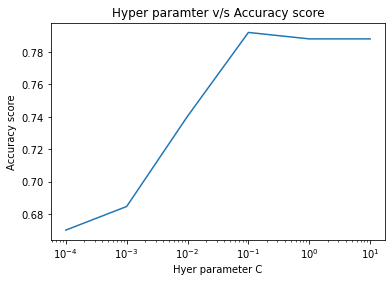

In [36]:
plt.plot(hyperparameter["C"],search.cv_results_["mean_test_score"])
plt.xscale("Log")
plt.xlabel("Hyer parameter C")
plt.ylabel("Accuracy score")
plt.title("Hyper paramter v/s Accuracy score")
plt.show()
        

# OR

In [37]:
search.best_estimator_

LogisticRegression(C=0.1)

# OR

In [38]:
search.best_params_

{'C': 0.1}

# 3.3 Logistic Regression with Best hyper parameter

In [39]:
model=LogisticRegression(C=search.best_params_["C"])
model.fit(x_train,y_train)

LogisticRegression(C=0.1)

In [40]:
model.coef_

array([[-0.66207936, -0.15851011, -0.03787907,  0.00438232,  1.11828976,
        -1.11636724,  0.10843927,  0.14821377, -0.25473053]])

# 3.4 Model Evavuation

In [41]:
y_test_pred=model.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [43]:
accuracy=accuracy_score(y_test,y_test_pred)

print("Test accuracy f the model is :", np.round(accuracy*100,4),"%")

Test accuracy f the model is : 78.3582 %


In [44]:
cml=confusion_matrix(y_test, y_test_pred)


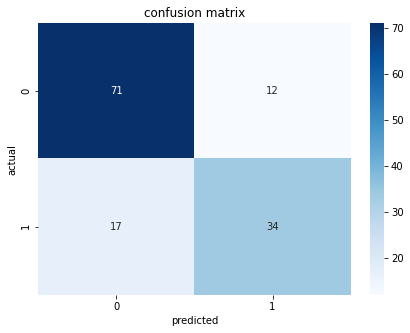

In [45]:
plt.figure(figsize=(7,5))

sns.heatmap(cml,annot=True,fmt="d",cmap="Blues")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

# 4. Using SGD with log loss 

# 4.1 Defining Model

In [46]:
from sklearn.linear_model import SGDClassifier
model=SGDClassifier(loss="log",random_state=12)

# 4.2 Hyperparameter Tuning

In [49]:
hyperparameter={"alpha":[0.0001,0.001,0.01,0.1,1,10]}
search=RandomizedSearchCV(model,hyperparameter,scoring="accuracy",
                          random_state=0)
search.fit(x_train,y_train)

RandomizedSearchCV(estimator=SGDClassifier(loss='log', random_state=12),
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10]},
                   random_state=0, scoring='accuracy')

In [50]:
search.cv_results_

{'mean_fit_time': array([0.00898824, 0.00315919, 0.00963025, 0.0081387 , 0.00639725,
        0.00320616]),
 'std_fit_time': array([0.01797647, 0.00624118, 0.00787626, 0.00732373, 0.00319862,
        0.00392673]),
 'mean_score_time': array([0.00640144, 0.        , 0.        , 0.        , 0.00319824,
        0.00160046]),
 'std_score_time': array([0.00320074, 0.        , 0.        , 0.        , 0.00391703,
        0.00320091]),
 'param_alpha': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 1, 10],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.0001},
  {'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10}],
 'split0_test_score': array([0.73509934, 0.7218543 , 0.66887417, 0.64238411, 0.68874172,
        0.68874172]),
 'split1_test_score': array([0.79470199, 0.80794702, 0.77483444, 0.7615894 , 0.69536424,
        0.69536424]),
 'split2_test_score': array([0.78807947, 0

In [51]:
search.best_params_

{'alpha': 0.0001}

# 4.3 Model with best hyperparameter

In [52]:
model=SGDClassifier(loss="log", alpha=search.best_params_["alpha"],
                    random_state=12)
model.fit(x_train,y_train)

SGDClassifier(loss='log', random_state=12)

In [53]:
model.coef_

array([[  -6.77744913, -175.34930861,  -67.67572809,  -13.48568635,
         274.24445736, -260.53111999,   54.99534816,   16.94259286,
         -58.22460365]])

# 4.4 Model Evaluation

In [54]:
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Test accuracy of the model is :", np.round(accuracy*100,4),"%")

Test accuracy of the model is : 61.9403 %


In [55]:
cm2=confusion_matrix(y_test,y_pred)

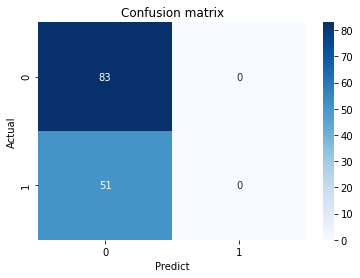

In [57]:
sns.heatmap(cm2,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

Both SGDClassifier and Logistic Regresson giving different results. Because both of these agorithms are different ,Logistic regression uses GD where as SGD classifier uses stochastic gradient descent. The convergence of the former will be more efficient and will yield better results. However, as the size of the data set increases, SGD will approach the accuracy of logistic regression.

If you have large dataset it is always better to use SGD instead of sklearn logistic regression implementation. sklearn logistic regression implementation will take too much time for training incase of large data. In that case SGD is better option.<br>

Also there is one option in SGDClassifier, which is n_iter_no_change. By default it will set 5 in sklearn.

**SGD with log loss and n_iter_no_change=100**

In [60]:
model=SGDClassifier(loss="log",random_state=12,n_iter_no_change=100)

In [62]:
hyperparameter={"alpha":[0.0001,0.001,0.01,0.1,1,10]}
search=RandomizedSearchCV(model,hyperparameter,scoring="accuracy",
                          random_state=0)
search.fit(x_train,y_train)

RandomizedSearchCV(estimator=SGDClassifier(loss='log', n_iter_no_change=100,
                                           random_state=12),
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10]},
                   random_state=0, scoring='accuracy')

In [63]:
search.best_params_

{'alpha': 0.01}

In [65]:
model=SGDClassifier(loss="log",alpha=search.best_params_["alpha"],
                    random_state=12,n_iter_no_change=100)
model.fit(x_train,y_train)

SGDClassifier(alpha=0.01, loss='log', n_iter_no_change=100, random_state=12)

**Model Evaluation**

In [67]:
y_pred=model.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
print("Test accuracy of the model is:",np.round(accuracy*100,4),"%")

Test accuracy of the model is: 76.1194 %
